In [ ]:
import pandas as pd
dataset=pd.read_csv("/content/auto-mpg.csv",header=None,na_values='?',sep='\s+')

In [ ]:
dataset.shape

(398, 9)

In [ ]:
dataset.columns=['displacement','mpg','cylinders','horsepower','weight','acceleration','model_year','origin','car_name']

In [ ]:
dataset.isnull().sum()

displacement    0
mpg             0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [ ]:
dataset=dataset.dropna()

In [ ]:
dataset.shape

(392, 9)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['car_name']=le.fit_transform(dataset['car_name'])
dataset.head()


<ipython-input-77-c3f4657121e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['car_name']=le.fit_transform(dataset['car_name'])


,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,48
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,35
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,229
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,13
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,159


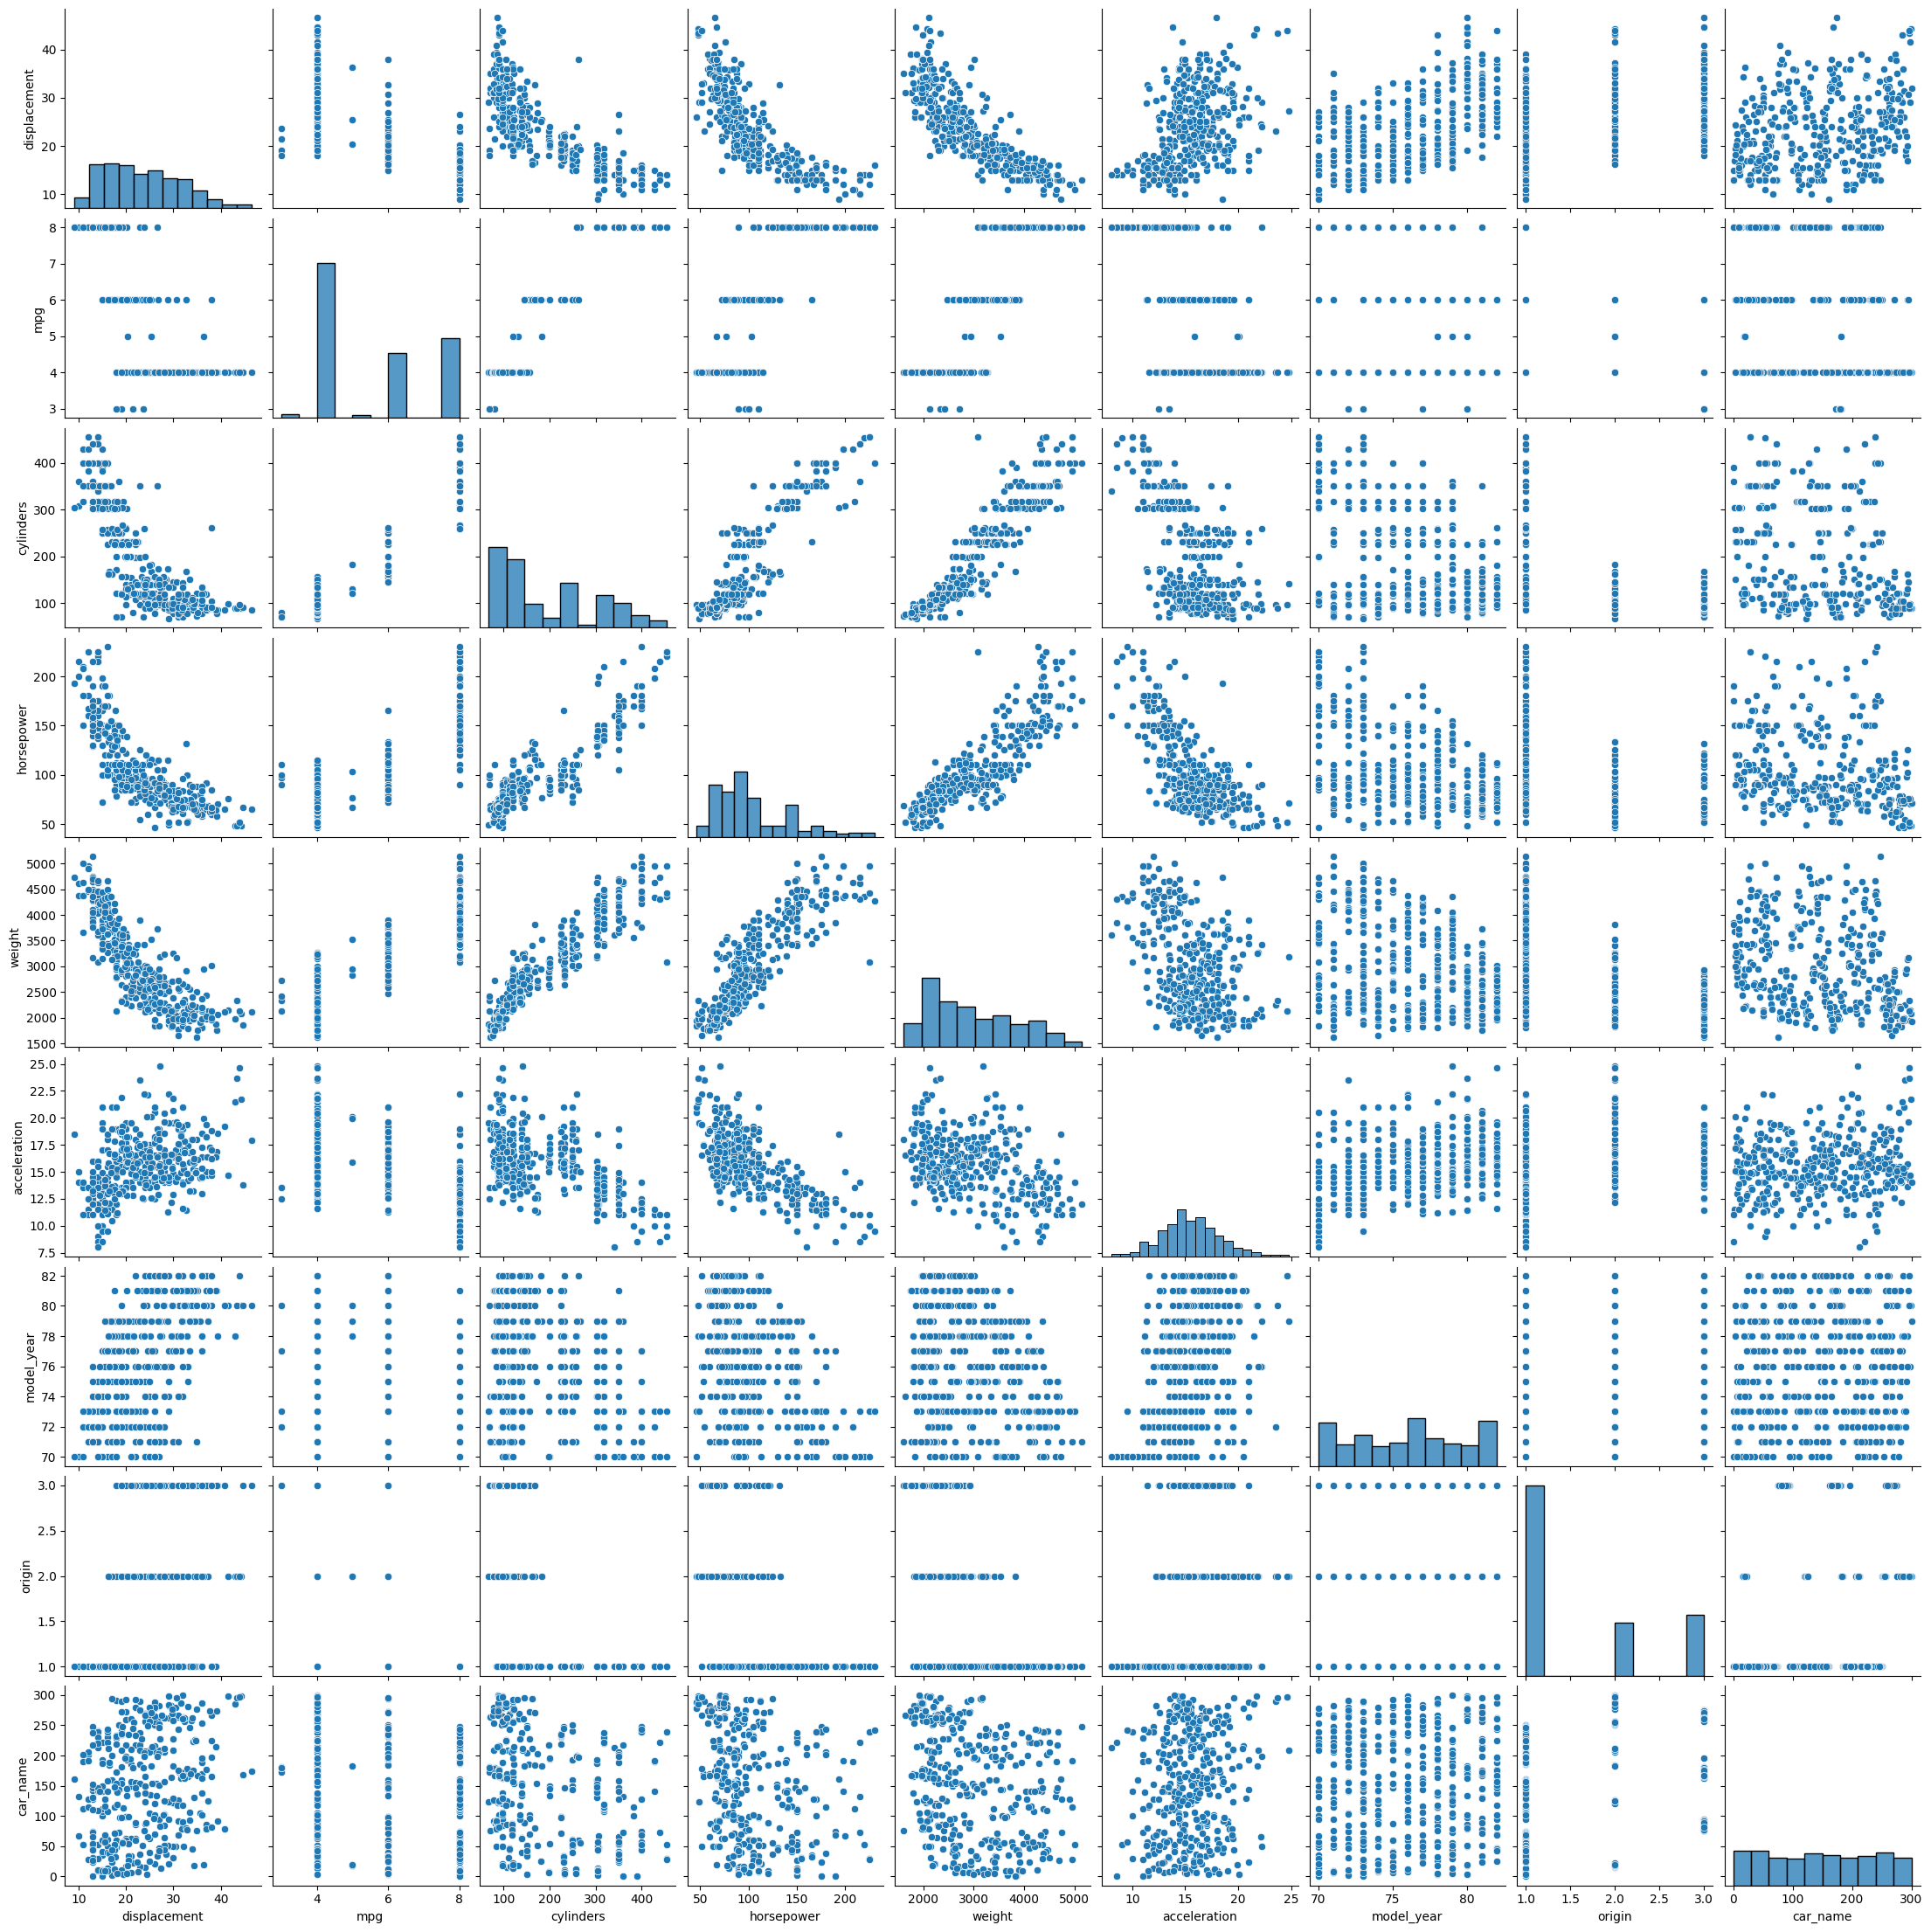

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(dataset)
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   mpg           392 non-null    int64  
 2   cylinders     392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 30.6 KB


In [ ]:
dataset['horsepower']=dataset['horsepower'].astype('float64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   mpg           392 non-null    int64  
 2   cylinders     392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 30.6 KB


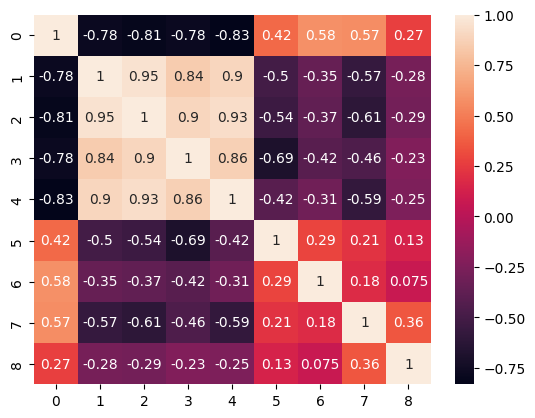

In [ ]:
import numpy as np
corr=np.corrcoef(dataset.values.T)
hm=sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
dataset.head()

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,48
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,35
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,229
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,13
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,159


In [ ]:
dataset=dataset.drop(columns=['model_year','car_name'])
print(dataset.shape)

(392, 7)


In [ ]:
target=dataset['mpg']
features=dataset.drop(columns=['mpg'])
features.shape

(392, 6)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.15)
print(xtrain.shape)
print(xtest.shape)

(333, 6)
(59, 6)


In [ ]:
xtrain.describe()

,displacement,cylinders,horsepower,weight,acceleration,origin
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,23.407808,195.022523,104.894895,2986.552553,15.445646,1.570571
std,7.940930,104.842611,38.502047,855.981221,2.772686,0.794544
min,9.000000,68.000000,46.000000,1649.000000,8.000000,1.000000
25%,17.000000,105.000000,75.000000,2210.000000,13.600000,1.000000
50%,22.500000,151.000000,95.000000,2807.000000,15.400000,1.000000
75%,29.000000,302.000000,130.000000,3672.000000,17.000000,2.000000
max,46.600000,455.000000,230.000000,4997.000000,24.800000,3.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain_std=sc.fit_transform(xtrain)
xtest_std=sc.fit_transform(xtest)
print(pd.DataFrame(xtrain_std).describe())

                  0             1             2             3             4  \
count  3.330000e+02  3.330000e+02  3.330000e+02  3.330000e+02  3.330000e+02   
mean   1.813698e-16 -1.160233e-16  1.360273e-16 -1.840370e-16  4.640932e-16   
std    1.001505e+00  1.001505e+00  1.001505e+00  1.001505e+00  1.001505e+00   
min   -1.817103e+00 -1.213378e+00 -1.531958e+00 -1.564947e+00 -2.689396e+00   
25%   -8.081485e-01 -8.599366e-01 -7.776180e-01 -9.085727e-01 -6.666542e-01   
50%   -1.144921e-01 -4.205234e-01 -2.573833e-01 -2.100779e-01 -1.648738e-02   
75%    7.052836e-01  1.021898e+00  6.530272e-01  8.019790e-01  5.614387e-01   
max    2.924984e+00  2.483425e+00  3.254200e+00  2.352240e+00  3.378828e+00   

                  5  
count  3.330000e+02  
mean  -6.668006e-17  
std    1.001505e+00  
min   -7.191915e-01  
25%   -7.191915e-01  
50%   -7.191915e-01  
75%    5.412862e-01  
max    1.801764e+00  


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain_std,ytrain)

LinearRegression()

In [ ]:
lr_train_results=lr.predict(xtrain_std)
lr_test_results=lr.predict(xtest_std)


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("Training accuracy: ")
print("MSE: ",mean_squared_error(ytrain,lr_train_results))
print("R2 score: ",r2_score(ytrain,lr_train_results))

Training accuracy: 
MSE:  0.27303231902905867
R2 score:  0.9091931327874256


In [ ]:
print("Testing accuracy: ")
print("MSE: ",mean_squared_error(ytest,lr_test_results))
print("R2 score: ",r2_score(ytest,lr_test_results))

Testing accuracy: 
MSE:  0.2950058772225524
R2 score:  0.870207854068288


In [ ]:
from sklearn.linear_model import RANSACRegressor

In [ ]:
ransac=RANSACRegressor(LinearRegression(),min_samples=50,residual_threshold=50)
ransac.fit(xtrain_std,ytrain)

RANSACRegressor(estimator=LinearRegression(), min_samples=50,
                residual_threshold=50)

In [ ]:
print(ransac.inlier_mask_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [ ]:
outlier=np.logical_not(ransac.inlier_mask_)

In [ ]:
print(outlier)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [ ]:
ransac_train_result=ransac.predict(xtrain_std)
ransac_test_result=ransac.predict(xtest_std)
print("Training accuracy: ")
print("MSE: ",mean_squared_error(ytrain,ransac_train_result))
print("R2 score: ",r2_score(ytrain,ransac_train_result))
print("Testing accuracy: ")
print("MSE: ",mean_squared_error(ytest,ransac_test_result))
print("R2 score: ",r2_score(ytest,ransac_test_result))

Training accuracy: 
MSE:  0.2730323190290586
R2 score:  0.9091931327874256
Testing accuracy: 
MSE:  0.295005877222552
R2 score:  0.8702078540682882


In [ ]:
input=dataset['cylinders']

In [ ]:
input.shape

(392,)

In [ ]:
target.shape

(392,)

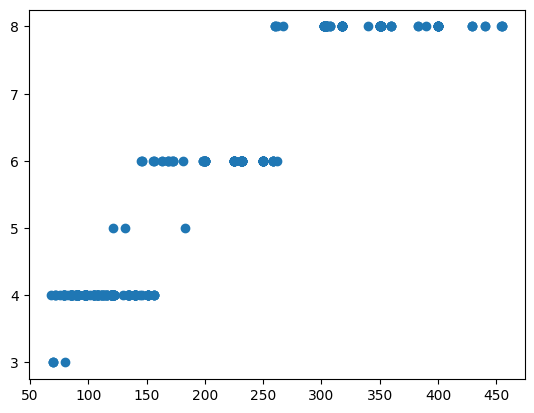

In [ ]:
plt.scatter(input,target)
plt.show()

In [ ]:
trainx,testx,trainy,testy=train_test_split(input,target, test_size=0.15)


In [ ]:
trainx=np.array(trainx).reshape(-1,1)
testx=np.array(testx).reshape(-1,1)

In [ ]:
lr1=LinearRegression()
lr1.fit(trainx,trainy)

LinearRegression()

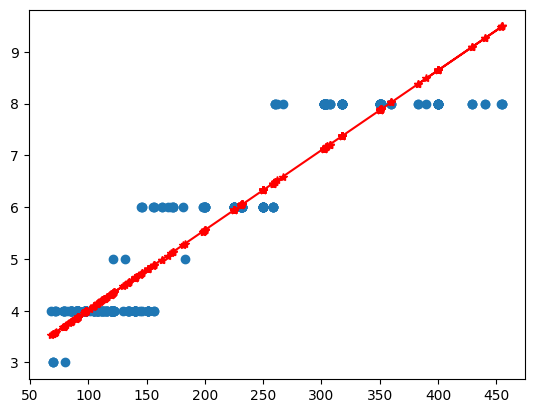

In [ ]:
sorted_input=np.sort(trainx)
plt.scatter(trainx,trainy)
plt.plot(sorted_input,lr1.predict(sorted_input),c='red',marker="*")
plt.show()

In [ ]:
ransac1=RANSACRegressor(LinearRegression(),min_samples=50,residual_threshold=0.5)
ransac1.fit(trainx,trainy)

RANSACRegressor(estimator=LinearRegression(), min_samples=50,
                residual_threshold=0.5)

In [ ]:
ransac_train_result=ransac1.predict(trainx)
ransac_test_result=ransac1.predict(testx)
print("Training Accuracy: ")
print("MSE: ",mean_squared_error(ransac_train_result,trainy))
print("R2 Score: ",r2_score(ransac_train_result,trainy))
print("Testing Accuracy: ")
print("MSE: ",mean_squared_error(ransac_test_result,testy))
print("R2 Score: ",r2_score(ransac_test_result,testy))


Training Accuracy: 
MSE:  0.3073182167528397
R2 Score:  0.8722316397484452
Testing Accuracy: 
MSE:  0.20689491335855884
R2 Score:  0.8889271446024105


In [ ]:
print(np.sum(ransac1.inlier_mask_==True))

229


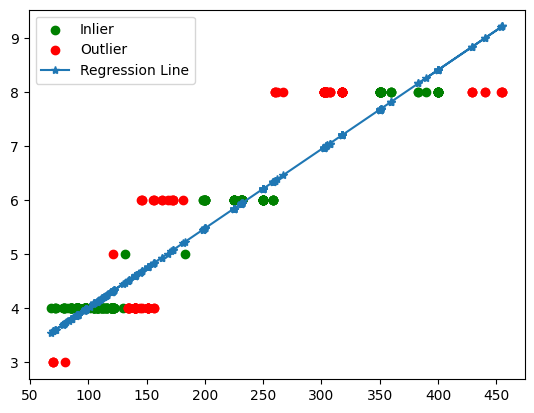

In [ ]:
inlier=ransac1.inlier_mask_
outlier=np.logical_not(inlier)
plt.scatter(trainx[inlier],trainy[inlier],c="green",label='Inlier')
plt.scatter(trainx[outlier],trainy[outlier],c="red",label='Outlier')
plt.plot(trainx,ransac1.predict(trainx),marker="*",label='Regression Line')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=2)
poly_2_train=poly.fit_transform(trainx)
poly_2_test=poly.fit_transform(testx)

In [ ]:
poly_2_train.shape

(333, 3)

In [ ]:
lr_poly=LinearRegression()
lr_poly.fit(poly_2_train,trainy)

LinearRegression()

In [ ]:
poly2_train_results=lr_poly.predict(poly_2_train)
poly2_test_results=lr_poly.predict(poly_2_test)
print("Training Accuracy: ")
print("MSE: ",mean_squared_error(poly2_train_results,trainy))
print("R2 Score: ",r2_score(poly2_train_results,trainy))
print("Testing Accuracy: ")
print("MSE: ",mean_squared_error(poly2_test_results,testy))
print("R2 Score: ",r2_score(poly2_test_results,testy))

Training Accuracy: 
MSE:  0.2464164355416882
R2 Score:  0.9093320883880415
Testing Accuracy: 
MSE:  0.22179272583773305
R2 Score:  0.9042647721496991


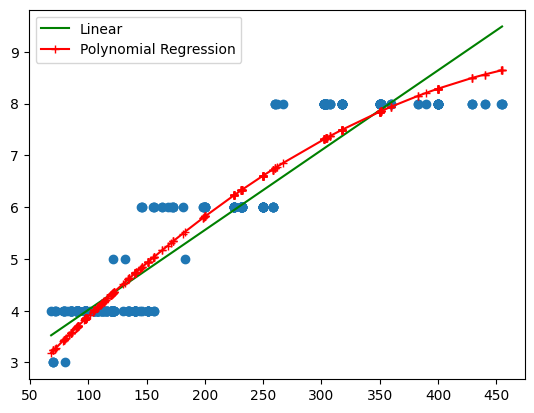

In [ ]:
input=sorted(trainx)
plt.scatter(trainx,trainy)
plt.plot(input,lr1.predict(input),c='green',label='Linear')
plt.plot(input,lr_poly.predict(poly.fit_transform(input)),c='red',marker='+',label='Polynomial Regression')
plt.legend()
plt.show()

Training Results:
MSE: 0.17686683425328037
R2 Score: 0.9365463864760303
Testing accuracy:
MSE: 0.13545217804934326
R2 Score: 0.9446099670444086


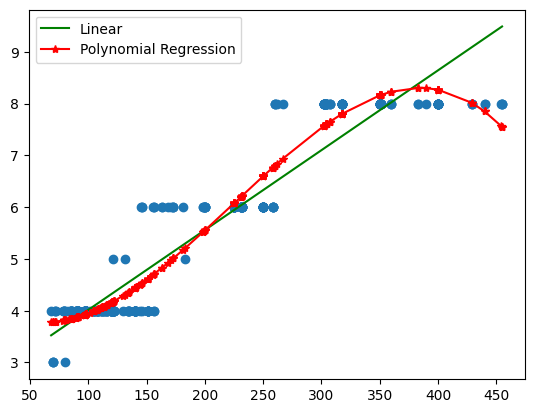

In [ ]:
poly=PolynomialFeatures(degree=3)
poly_3_train=poly.fit_transform(trainx)
poly_3_test=poly.fit_transform(testx)
poly_3_train.shape
lr_poly=LinearRegression()
lr_poly.fit(poly_3_train, trainy)
poly3_train_results=lr_poly.predict(poly_3_train)
poly3_test_results=lr_poly.predict(poly_3_test)
print("Training Results:")
print("MSE:",mean_squared_error(poly3_train_results, trainy))
print("R2 Score:", r2_score(poly3_train_results, trainy))
print("Testing accuracy:")
print("MSE:",mean_squared_error(poly3_test_results, testy))
print("R2 Score:", r2_score(poly3_test_results, testy))
input=sorted(trainx)
plt.scatter(trainx, trainy)
plt.plot(input, lr1.predict(input), c='green', label='Linear')
plt.plot(input, lr_poly.predict(poly.fit_transform(input)), c='red', marker='*', label='Polynomial Regression')
plt.legend()
plt.show()

Training Results:
MSE: 0.17686683425328037
R2 Score: 0.9365463864760303
Testing accuracy:
MSE: 0.13545217804934326
R2 Score: 0.9446099670444086


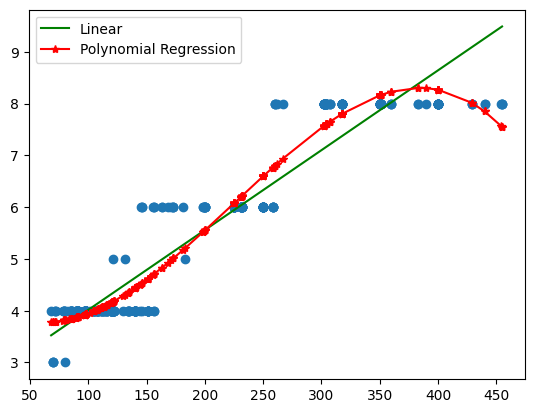

In [ ]:
poly4=PolynomialFeatures(degree=4)
poly_4_train=poly.fit_transform(trainx)
poly_4_test=poly.fit_transform(testx)
poly_4_train.shape
lr_poly=LinearRegression()
lr_poly.fit(poly_4_train, trainy)
poly4_train_results=lr_poly.predict(poly_4_train)
poly4_test_results=lr_poly.predict(poly_4_test)
print("Training Results:")
print("MSE:",mean_squared_error(poly4_train_results, trainy))
print("R2 Score:", r2_score(poly3_train_results, trainy))
print("Testing accuracy:")
print("MSE:",mean_squared_error(poly4_test_results, testy))
print("R2 Score:", r2_score(poly4_test_results, testy))
input=sorted(trainx)
plt.scatter(trainx, trainy)
plt.plot(input, lr1.predict(input), c='green', label='Linear')
plt.plot(input, lr_poly.predict(poly.fit_transform(input)), c='red', marker='*', label='Polynomial Regression')
plt.legend()
plt.show()

Training Results:
MSE: 0.17686683425328037
R2 Score: 0.9365463864760303
Testing accuracy:
MSE: 0.13545217804934326
R2 Score: 0.9446099670444086


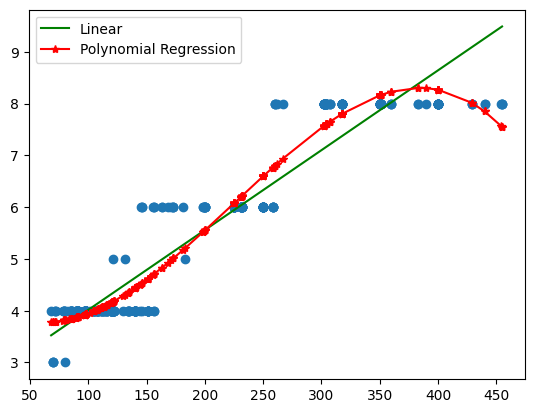

In [ ]:
poly5=PolynomialFeatures(degree=5)
poly_5_train=poly.fit_transform(trainx)
poly_5_test=poly.fit_transform(testx)
poly_5_train.shape
lr_poly=LinearRegression()
lr_poly.fit(poly_5_train, trainy)
poly5_train_results=lr_poly.predict(poly_5_train)
poly5_test_results=lr_poly.predict(poly_5_test)
print("Training Results:")
print("MSE:",mean_squared_error(poly5_train_results, trainy))
print("R2 Score:", r2_score(poly5_train_results, trainy))
print("Testing accuracy:")
print("MSE:",mean_squared_error(poly5_test_results, testy))
print("R2 Score:", r2_score(poly5_test_results, testy))
input=sorted(trainx)
plt.scatter(trainx, trainy)
plt.plot(input, lr1.predict(input), c='green', label='Linear')
plt.plot(input, lr_poly.predict(poly.fit_transform(input)), c='red', marker='*', label='Polynomial Regression')
plt.legend()
plt.show()

In [ ]:
#regularized
testy.shape

(59,)

In [ ]:
from sklearn.linear_model import Lasso
l1=Lasso()
l1.fit(trainx,trainy)
l1_train_result=l1.predict(trainx)
l1_test_result=l1.predict(testx)
print("Training results: ")
print("Mse: ",mean_squared_error(l1_train_result,trainy))
print("R2 score: ",r2_score(l1_train_result,trainy))
print("Testing results: ")
print("Mse: ",mean_squared_error(l1_test_result,testy))
print("R2 score: ",r2_score(l1_test_result,testy))


Training results: 
Mse:  0.29463133709597134
R2 score:  0.8883522628292021
Testing results: 
Mse:  0.18933146304810675
R2 score:  0.9073560878437797


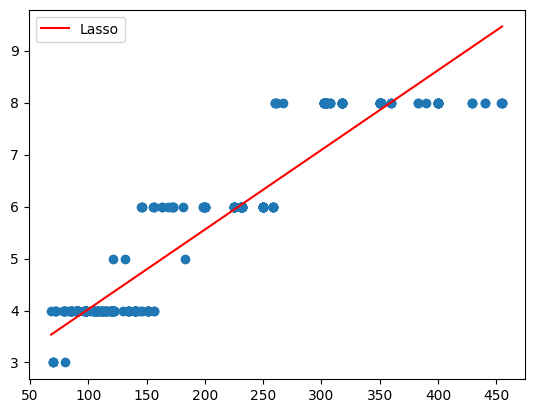

In [ ]:
plt.scatter(trainx, trainy)
plt.plot(input,l1.predict(input),c='red',label='Lasso')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
l2=Ridge()
l2.fit(trainx,trainy)
l2_train_result=l2.predict(trainx)
l2_test_result=l2.predict(testx)
print("Training results: ")
print("Mse: ",mean_squared_error(l2_train_result,trainy))
print("R2 score: ",r2_score(l2_train_result,trainy))
print("Testing results: ")
print("Mse: ",mean_squared_error(l2_test_result,testy))
print("R2 score: ",r2_score(l2_test_result,testy))

Training results: 
Mse:  0.29454240361489387
R2 score:  0.8896705932219571
Testing results: 
Mse:  0.18808692821802594
R2 score:  0.9090243480049518


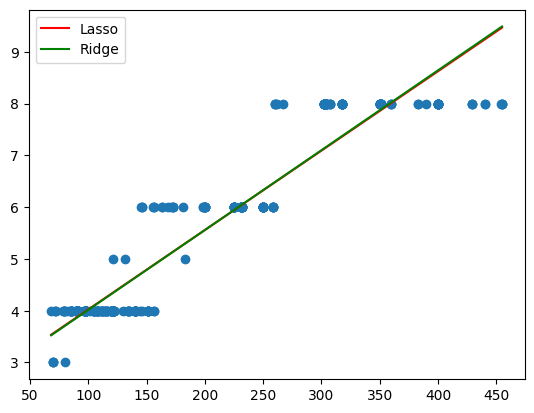

In [ ]:
plt.scatter(trainx, trainy)
plt.plot(input,l1.predict(input),c='red',label='Lasso')
plt.plot(input,l2.predict(input),c='green',label='Ridge')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet
l12=ElasticNet()
l12.fit(trainx,trainy)
l12_train_result=l2.predict(trainx)
l12_test_result=l2.predict(testx)
print("Training results: ")
print("Mse: ",mean_squared_error(l12_train_result,trainy))
print("R2 score: ",r2_score(l12_train_result,trainy))
print("Testing results: ")
print("Mse: ",mean_squared_error(l12_test_result,testy))
print("R2 score: ",r2_score(l12_test_result,testy))

Training results: 
Mse:  0.29454240361489387
R2 score:  0.8896705932219571
Testing results: 
Mse:  0.18808692821802594
R2 score:  0.9090243480049518


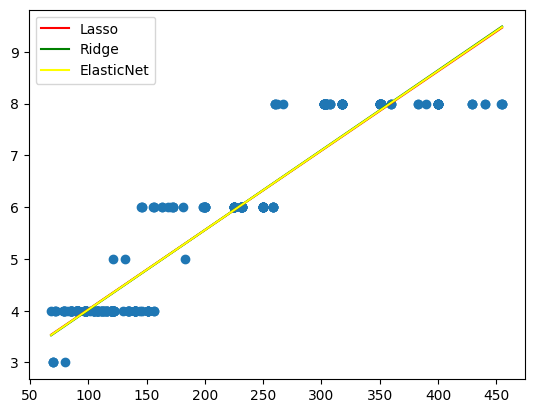

In [ ]:
plt.scatter(trainx, trainy)
plt.plot(input,l1.predict(input),c='red',label='Lasso')
plt.plot(input,l2.predict(input),c='green',label='Ridge')
plt.plot(input,l12.predict(input),c='Yellow',label='ElasticNet')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(trainx,trainy)
dt_train_result=dt.predict(trainx)
dt_test_result=dt.predict(testx)
print("Training results: ")
print("Mse: ",mean_squared_error(dt_train_result,trainy))
print("R2 score: ",r2_score(dt_train_result,trainy))
print("Testing results: ")
print("Mse: ",mean_squared_error(dt_test_result,testy))
print("R2 score: ",r2_score(dt_test_result,testy))

Training results: 
Mse:  0.022647647647647647
R2 score:  0.9923008032594838
Testing results: 
Mse:  0.10248940677966102
R2 score:  0.9592227079850842


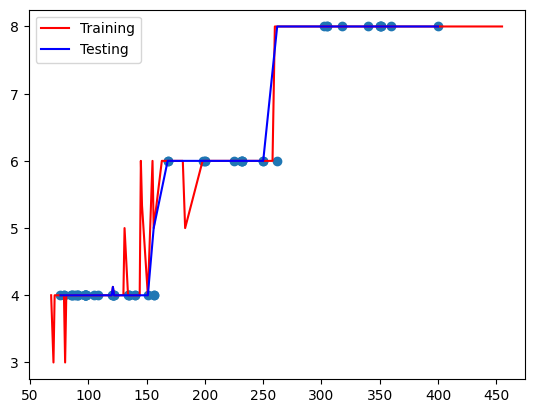

In [ ]:
input_test=sorted(testx)
plt.scatter(testx, testy)
plt.plot(input,dt.predict(input),c='red',label="Training")
plt.plot(input_test,dt.predict(input_test),c='blue',label='Testing')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(trainx,trainy)
svr_train_result=svr.predict(trainx)
svr_test_result=svr.predict(testx)
print("Training results: ")
print("Mse: ",mean_squared_error(svr_train_result,trainy))
print("R2 score: ",r2_score(svr_train_result,trainy))
print("Testing results: ")
print("Mse: ",mean_squared_error(svr_test_result,testy))
print("R2 score: ",r2_score(svr_test_result,testy))

Training results: 
Mse:  0.18383579766353436
R2 score:  0.9381327300040341
Testing results: 
Mse:  0.1333081401783087
R2 score:  0.947584571437065


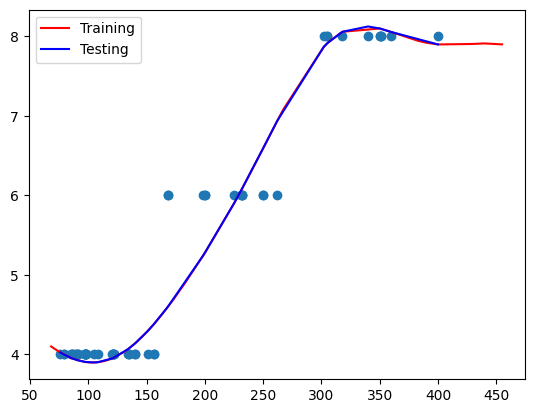

In [ ]:
input_test=sorted(testx)
plt.scatter(testx, testy)
plt.plot(input,svr.predict(input),c='red',label="Training")
plt.plot(input_test,svr.predict(input_test),c='blue',label='Testing')
plt.legend()
plt.show()

NameError: name 'df' is not defined